In [1]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt


import model_opt
import data_generate
import algo_GD
import helper

In [2]:
noise = helper.pareto
f = model_opt.RosenBrock(err = 100,noise=noise)
w = np.array([3,3])

In [3]:
f.noise
_t_max = 2
algo = algo_GD.SGD(w_init=w,t_max=_t_max,a=0.0007)

In [4]:
algo.update(model=f)

In [5]:
algo.w

array([-2.04343626,  3.83936374])

In [6]:
if __name__ == "__main__":
    
    # 自分のマシンでコアが４or6
    cpu_count = mproc.cpu_count()
    mypool = mproc.Pool(cpu_count)
    w = np.ones(cpu_count)
    first_result = mypool.map(func=helper.pareto, iterable=w)
    
    mypool.close() # important for stopping memory leaks.
    mypool.join() # wait for all workers to exit.

In [7]:
first_result

[0.4616299434229636,
 0.3954600563715278,
 0.30734072860205486,
 0.7942359038724005,
 1.1874870797871377,
 0.8336591105856197]

In [8]:
x = np.arange(10)
noise = helper.gauss(x)
k = helper.iqr(noise)

In [9]:
k

1.5777359941408629

In [72]:
iqr_store = []
for i in range(10000):
    x = np.arange(10000)
    noise = helper.gauss(x,scale=100,loc=0)
    k = helper.iqr(noise)
    iqr_store.append(k)

(array([  12.,   95.,  524., 1629., 2853., 2733., 1585.,  487.,   77.,
           5.]),
 array([128.87804386, 130.08126018, 131.2844765 , 132.48769282,
        133.69090914, 134.89412546, 136.09734178, 137.3005581 ,
        138.50377442, 139.70699074, 140.91020706]),
 <a list of 10 Patch objects>)

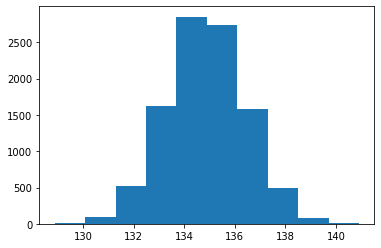

In [73]:
plt.hist(iqr_store)

In [74]:
np.mean(iqr_store) / 1.349

99.97030303030233

(array([ 1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
         5.,  2.,  3.,  3.,  7.,  4.,  4.,  9.,  6.,  9., 12., 15., 11.,
         7., 15., 17., 14., 16., 17., 15., 19., 15., 20., 16., 19., 22.,
        29., 24., 22., 23., 17., 28., 33., 27., 30., 31., 24., 27., 26.,
        21., 23., 26., 27., 19., 10.,  8., 10., 13., 14., 13., 21., 18.,
        19., 12., 10.,  6.,  3.,  7.,  7., 10.,  3.,  3.,  3.,  3.,  4.,
         7.,  3.,  4.,  6.,  1.,  1.,  2.,  2.,  2.,  2.,  0.,  1.,  1.,
         1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([0.78223378, 0.78924907, 0.79626435, 0.80327964, 0.81029492,
        0.81731021, 0.8243255 , 0.83134078, 0.83835607, 0.84537135,
        0.85238664, 0.85940193, 0.86641721, 0.8734325 , 0.88044778,
        0.88746307, 0.89447835, 0.90149364, 0.90850893, 0.91552421,
        0.9225395 , 0.92955478, 0.93657007, 0.94358535, 0.95060064,
        0.95761593, 0.96463121, 0.9716465 , 0.97866178, 0.98567707,
        0.99269235, 0.9997

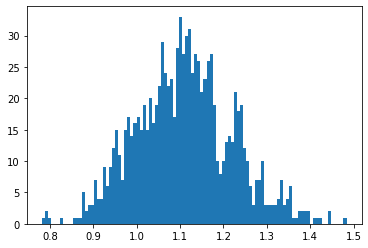

In [40]:
plt.hist(helper.lognormal(mean=0.1,sigma=0.1,w=np.arange(1000)),bins=100)

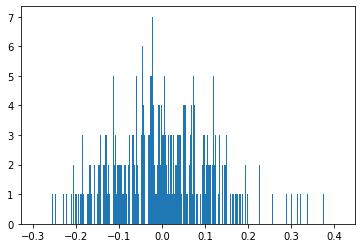

In [49]:
k = helper.lognormal(mean=0.1,sigma=0.1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

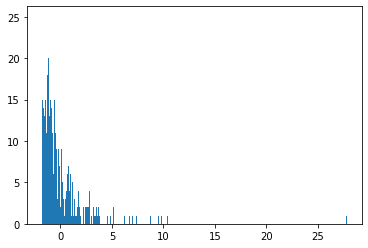

In [55]:
k = helper.lognormal(mean=0.1,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [56]:
helper.iqr(k)

1.495522724345386